# Assignment 1

## Question1

In [1]:
def everest_folds(thickness, height):
    import math
    folds = (math.log(height) - math.log(thickness)) / math.log(2)
    return math.ceil(folds)

print(everest_folds(1, 8848000))
    

24


## Question2

In [2]:
import math

V_1 = 80 #Arbitrarily set value of initial volume in tank
t = 0
a = 0.1
V_2 = 80 #V_2 equals V_1 at time zero
while V_2 >= (V_1/2):
    t = t + 1
    V_2 = V_1 * math.exp(-a*t)
print(t)

7


## Question 3

In [3]:
Principal = 100
Rate = 0.05
t = 5 
for i in range (1, t+1):
    Amount = Principal * pow((1 + Rate), i)
    print (round(Amount))

105
110
116
122
128


## Question 4

In [4]:
PresentVal = 20000
rate = 0.01

for n in range(1, 4):
    Payment = (PresentVal * rate)/(1 - pow(1 + rate, -n*12))
    print(round(Payment))

1777
941
664


## Question 5

Days to break even is 69.67336683417085 which is approximately 70 Days


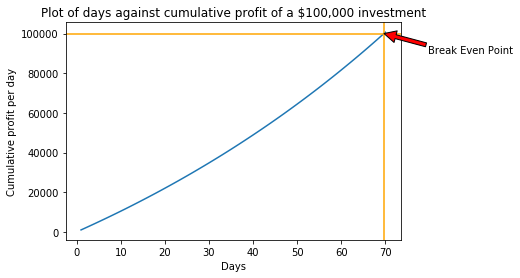

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

initial_investment = 100000
t = 1
customer = 100
profit = 1000
days = [t]
cumulative_profit = [profit]

while profit <= initial_investment:
    customer = customer * 1.01
    profit = profit + (10* round(customer))
    t = t + 1
    days.append(t)
    cumulative_profit.append(profit)

break_even_day = np.interp(100000, cumulative_profit, days)
    
print("Days to break even is " + str(break_even_day) + " which is approximately " + str(t) + " Days")

fig, draw = plt.subplots()
draw.plot(days, cumulative_profit);
draw.axhline(y = 100000, color = "orange")
draw.axvline(x = break_even_day, color = "orange")
draw.annotate("Break Even Point", xy = (break_even_day, 100000), xytext = (break_even_day + 10, 90000),
             arrowprops = dict(facecolor ='red',shrink = 0.001),)
plt.xlabel("Days");
plt.ylabel("Cumulative profit per day");
plt.title("Plot of days against cumulative profit of a $100,000 investment");


plt.show()

## Question 6

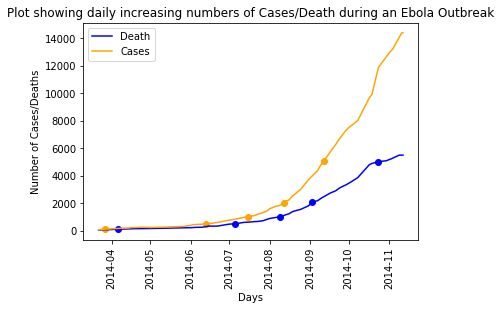

In [6]:
import pandas as pd

ebola_data = pd.read_excel("ebola_download.xls", sheet_name='Sheet1')

ebola_data.set_index("Date", inplace = True)

date_index = pd.date_range("2014-03-22","2014-11-12", freq = 'D' )
ebola_data = ebola_data.reindex(date_index).interpolate()

date = ebola_data.index
ebola_cases = ebola_data.Cases
ebola_death = ebola_data.Death


cases_100=[]
cases_500=[]
cases_1000=[]
cases_2000=[]
cases_5000=[]

for i in ebola_cases:
    if i > 100:
        cases_100.append(ebola_data[ebola_cases== i].index.values)
    if i > 500:
        cases_500.append(ebola_data[ebola_cases== i].index.values)
    if i > 1000:
        cases_1000.append(ebola_data[ebola_cases== i].index.values)
    if i > 2000:
        cases_2000.append(ebola_data[ebola_cases== i].index.values)
    if i > 5000:
        cases_5000.append(ebola_data[ebola_cases== i].index.values)
        
special_dates_1 = [cases_100[0], cases_500[0], cases_1000[0], cases_2000[0],cases_5000[0]]
special_cases = [ebola_cases[special_dates_1[0]], ebola_cases[special_dates_1[1]], ebola_cases[special_dates_1[2]],
                ebola_cases[special_dates_1[3]], ebola_cases[special_dates_1[4]]]

death_100=[]
death_500=[]
death_1000=[]
death_2000=[]
death_5000=[]

for i in ebola_death:
    if i > 100:
        death_100.append(ebola_data[ebola_death== i].index.values)
    if i > 500:
        death_500.append(ebola_data[ebola_death== i].index.values)
    if i > 1000:
        death_1000.append(ebola_data[ebola_death== i].index.values)
    if i > 2000:
        death_2000.append(ebola_data[ebola_death== i].index.values)
    if i > 5000:
        death_5000.append(ebola_data[ebola_death== i].index.values)
        
special_dates_2 = [death_100[0], death_500[0], death_1000[0], death_2000[0],death_5000[0]]
special_death = [ebola_death[special_dates_2[0]], ebola_death[special_dates_2[1]], ebola_death[special_dates_2[2]],
                ebola_death[special_dates_2[3]], ebola_death[special_dates_2[4]]]

fig, draw = plt.subplots()
draw.plot(special_dates_1, special_cases, 'o', color = "orange");
draw.plot(special_dates_2, special_death, 'bo');
draw.plot(date,ebola_death, color = 'blue');
draw.plot(date,ebola_cases, color = 'orange');
plt.title("Plot showing daily increasing numbers of Cases/Death during an Ebola Outbreak")
plt.xlabel("Days")
plt.ylabel("Number of Cases/Deaths")
plt.legend();
plt.xticks(rotation = 90);
plt.show();

## Question 7

In [7]:
growth_rate_cases = []
cases = ebola_data[["Cases"]]
cases = dict(cases)["Cases"]

growth_rate_death = []
death = ebola_data[["Death"]]
death = dict(death)["Death"]

for i in range(1, len(cases)):
    growth = ((cases[i] - cases[i-1]) * 100.0 / cases[i-1])
    growth_rate_cases.append(growth)
    
for j in range(1, len(death)):
    growth = ((death[j] - death[j-1]) * 100.0 / death[j-1])
    growth_rate_death.append(growth)
    
average_growth_cases = sum(growth_rate_cases)/len(growth_rate_cases)
print("Average growth rate per day for Cases: " + str(average_growth_cases))

average_growth_death = sum(growth_rate_death)/len(growth_rate_death)
print("Average growth rate per day for Death: " + str(average_growth_death))

Average growth rate per day for Cases: 2.5065218916499963
Average growth rate per day for Death: 2.330608083367968


## Question 8

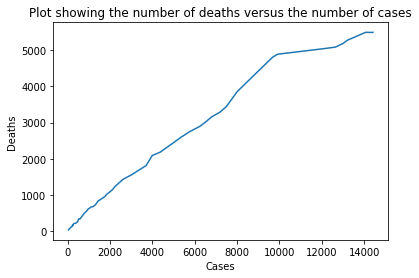

The ratio of Ebola Death to Ebola cases is approximately: 0.47 or 47:100


In [8]:
fig, draw = plt.subplots()
draw.plot(ebola_cases, ebola_death);
plt.title("Plot showing the number of deaths versus the number of cases");
plt.ylabel("Deaths");
plt.xlabel("Cases");
plt.show()

ave = round(sum(ebola_death)/sum(ebola_cases), 2)
print("The ratio of Ebola Death to Ebola cases is approximately: " + str(ave) + " or " + str(int(ave*100)) + ":" + "100")

## Question 9

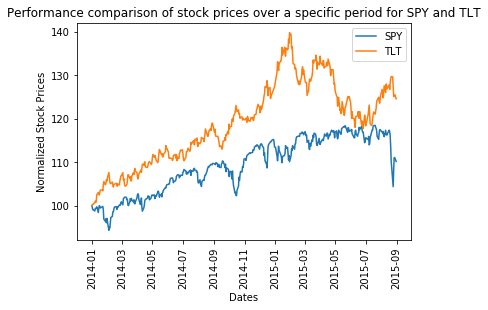

In [9]:
data_1 = pd.read_csv("SPY.csv")[["Date","Adj Close"]]
data_2 = pd.read_csv("TLT.csv")[["Date","Adj Close"]]

data_1["SPY_norm"] = (data_1["Adj Close"]/data_1["Adj Close"][0])*100
data_2["TLT_norm"] = (data_2["Adj Close"]/data_2["Adj Close"][0])*100

data_1["Date"] = data_1["Date"].astype('datetime64[ns]')
data_2["Date"] = data_2["Date"].astype('datetime64[ns]')

data_1.set_index("Date", inplace = True)
data_2.set_index("Date", inplace =True)

date_index = pd.date_range("2013-12-31","2015-08-31", freq = 'D' )
data_1 = data_1.reindex(date_index).interpolate()
data_2 = data_2.reindex(date_index).interpolate()

data_2.head()

x = data_1.index
y_1 = data_1.SPY_norm
y_2 = data_2.TLT_norm

plt.plot(x,y_1, label="SPY");
plt.plot(x, y_2, label = "TLT");
plt.xticks(rotation = 90);
plt.xlabel("Dates");
plt.ylabel("Normalized Stock Prices")
plt.title("Performance comparison of stock prices over a specific period for SPY and TLT")
plt.legend()
plt.show()

## Question 10

In [10]:
import statistics as st

SPY_daily_returns = []
TLT_daily_returns = []

SPY = dict(data_1[["Adj Close"]])["Adj Close"]
TLT = dict(data_2[["Adj Close"]])["Adj Close"]
#print(SPY)

for i in range(1, len(SPY)):
    rate = (SPY[i]/SPY[i-1]) - 1
    SPY_daily_returns.append(rate)
    
for j in range(1, len(TLT)):
    rate = ((TLT[i]/TLT[i-1]) - 1)
    TLT_daily_returns.append(rate)

print("The average daily returns for SPY is: " + str(st.mean(SPY_daily_returns)))
print("The minimum daily returns for SPY is: " + str(min(SPY_daily_returns)))
print("The maximum daily returns for SPY is: " + str(max(SPY_daily_returns)))

print("\nThe average daily returns for TLT is: " + str(st.mean(TLT_daily_returns)))
print("The minimum daily returns for TLT is: " + str(min(TLT_daily_returns)))
print("The maximum daily returns for TLT is: " + str(max(TLT_daily_returns)))

The average daily returns for SPY is: 0.00017747373001878337
The minimum daily returns for SPY is: -0.03010264894594228
The maximum daily returns for SPY is: 0.03839371960231941

The average daily returns for TLT is: -0.0025740202916312294
The minimum daily returns for TLT is: -0.0025740202916312294
The maximum daily returns for TLT is: -0.0025740202916312294
